# Essential library imports

In [25]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf
%load_ext autoreload
%autoreload 2
from Models import MLP,CNN,self_LSTM,SVM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Data Preprocessing

Due to the huge size of the CSE-CIC-IDS2018 datasets collectively, only a portion of the entire dataset will be used. Specific files are selected for every attack vectors made known on the source.

## Data Preprocessing functions

In [2]:
def encode_labels(label):
    # Benign network traffic
    if label=="Benign":
        return 0
    # Bruteforce attack
    elif "Bruteforce" in label or "BruteForce" in label:
        return 1 
    # DoS attack
    elif "Hulk" in label or "GoldenEye" in label or "Slowloris" in label or "SlowHTTPTest" in label:
        return 2 
    # Web attack
    elif "Web" in label or "XSS" in label or "SQL" in label:
        return 3 
    # Infiltration attack
    elif "Infilteration" in label:
        return 4 
    # Botnet attack
    elif "Bot" in label:
        return 5  
    # DDoS attack
    elif "DDoS" in label or "DDOS":
        return 6 

In [3]:
def process_data(df):
    # Dropping all unnecessary columns
    df = df.drop("Dst Port", axis = 1)
    df = df.drop("Timestamp", axis = 1)
    
    # Drop any rows with "Infinity" values or labels with the value "Label"
    df = df.drop(df[df.eq("Infinity").any(1)].index,axis=0)
    df = df.drop(df[df.eq("Label").any(1)].index,axis=0)
    
    # Percentage of missing data
    print("Percentage of Missing Data:",round(df.isnull().sum().sum()/len(df)*100,3),"% removed")
    df = df.dropna()

    # Percent of duplicated data
    print("Percentage of Duplicated Data:", round(len(df[df.duplicated()])/len(df)*100,2),"% removed")
    df = df.drop_duplicates()

    # One-hot encoding the protocol feature 
    df['Protocol'] = df['Protocol'].astype(int)
    dum_df = pd.get_dummies(df["Protocol"],prefix="prot_")
    df = df.drop(["Protocol"],axis=1)
    df = pd.concat([df,dum_df],axis=1) 
    
    df["vector"] = np.vectorize(encode_labels)(df["Label"])
    df = df.drop("Label", axis = 1)

    return df 

## Label types/attack vectors

To prepare and clean the dataset to be suitable for training and testing neural networks, the labels will be encoded numerically. The list below shows the conversion of every labels:

<ul>
    <li>0 - Benign</li>
    <li>1 - Bruteforce attack</li>
    <li>2 - DoS attack</li>
    <li>3 - Web attack</li>
    <li>4 - Infiltration attack</li>
    <li>5 - Botnet attack</li>
    <li>6 - DDoS attack</li>
</ul>

## Preprocessing process

The CSE-CICIDS2018 dataset was generated in batches spanning over a period of about 2 weeks. Each day, a dataset was generated with a different attack vector filled with benign network traffic. In this section, the attack vectors were extracted from their respective datasets.

### Brute-force attacking

In [4]:
bruteforce = pd.read_csv("cse-cic-ids2018-datasets/02-14-2018.csv")

In [5]:
bruteforce['Label'].value_counts()

Benign            667626
FTP-BruteForce    193360
SSH-Bruteforce    187589
Name: Label, dtype: int64

In [6]:
bruteforce = process_data(bruteforce)

Percentage of Missing Data: 0.217 % removed
Percentage of Duplicated Data: 40.8 % removed


In [7]:
bruteforce.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,vector
0,112641719,3,0,0,0,0,0,0.000000,0.000000,0,...,0,0,56320859.5,139.300036,56320958,56320761,1,0,0,0
1,112641466,3,0,0,0,0,0,0.000000,0.000000,0,...,0,0,56320733.0,114.551299,56320814,56320652,1,0,0,0
2,112638623,3,0,0,0,0,0,0.000000,0.000000,0,...,0,0,56319311.5,301.934596,56319525,56319098,1,0,0,0
3,6453966,15,10,1239,2273,744,0,82.600000,196.741237,976,...,0,0,0.0,0.000000,0,0,0,1,0,0
4,8804066,14,11,1143,2209,744,0,81.642857,203.745545,976,...,0,0,0.0,0.000000,0,0,0,1,0,0


In [8]:
bruteforce["vector"].value_counts()

0    525356
1     94101
Name: vector, dtype: int64

### Dos attacks

In [9]:
dos = pd.concat([pd.read_csv("cse-cic-ids2018-datasets/02-15-2018.csv",low_memory=False), 
                 pd.read_csv("cse-cic-ids2018-datasets/02-16-2018.csv",low_memory=False)])

In [10]:
dos["Label"].value_counts()

Benign                      1442849
DoS attacks-Hulk             461912
DoS attacks-SlowHTTPTest     139890
DoS attacks-GoldenEye         41508
DoS attacks-Slowloris         10990
Label                             1
Name: Label, dtype: int64

In [11]:
dos = process_data(dos)

Percentage of Missing Data: 0.235 % removed
Percentage of Duplicated Data: 33.71 % removed


In [12]:
dos.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,vector
0,112641158,3,0,0,0,0,0,0.0,0.0,0,...,0,0,56320579.0,704.278354,56321077,56320081,1,0,0,0
1,37366762,14,12,2168,2993,712,0,154.857143,254.85527,976,...,1601183,321569,11431221.0,3644990.559845,15617415,8960247,0,1,0,0
2,543,2,0,64,0,64,0,32.0,45.254834,0,...,0,0,0.0,0.0,0,0,0,1,0,0
3,112640703,3,0,0,0,0,0,0.0,0.0,0,...,0,0,56320351.5,366.988419,56320611,56320092,1,0,0,0
4,112640874,3,0,0,0,0,0,0.0,0.0,0,...,0,0,56320437.0,719.834703,56320946,56319928,1,0,0,0


In [13]:
dos["vector"].value_counts()

0    1190332
2     196568
Name: vector, dtype: int64

### Web attacks

In [14]:
web = pd.concat([pd.read_csv("cse-cic-ids2018-datasets/02-22-2018.csv",low_memory=False), 
                 pd.read_csv("cse-cic-ids2018-datasets/02-23-2018.csv",low_memory=False)])

In [15]:
web["Label"].value_counts()

Benign              2096222
Brute Force -Web        611
Brute Force -XSS        230
SQL Injection            87
Name: Label, dtype: int64

In [16]:
web = process_data(web)

Percentage of Missing Data: 0.349 % removed
Percentage of Duplicated Data: 23.56 % removed


In [17]:
web.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,vector
0,20553406,10,7,1063,1297,744,0,106.3,239.357496,976,...,1027304,1027304,1.952608e+07,0.000000e+00,19526080,19526080,0,1,0,0
1,790,2,0,848,0,848,0,424.0,599.626550,0,...,0,0,0.000000e+00,0.000000e+00,0,0,0,1,0,0
2,99745913,5,0,2500,0,500,500,500.0,0.000000,0,...,4000203,4000203,3.191524e+07,3.792787e+07,75584115,7200679,0,0,1,0
3,99745913,5,0,2500,0,500,500,500.0,0.000000,0,...,4000189,4000189,3.191524e+07,3.792788e+07,75584130,7200693,0,0,1,0
4,89481361,6,0,3000,0,500,500,500.0,0.000000,0,...,4000554,4000554,2.137020e+07,1.528109e+07,41990741,7200848,0,0,1,0


In [18]:
web["vector"].value_counts()

0    1596687
3        867
Name: vector, dtype: int64

### Infiltration Attacks

In [19]:
infiltration =  pd.concat([pd.read_csv("cse-cic-ids2018-datasets/02-28-2018.csv",low_memory=False), 
                   pd.read_csv("cse-cic-ids2018-datasets/03-01-2018.csv",low_memory=False)])

In [20]:
infiltration["Label"].value_counts()

Benign           782237
Infilteration    161934
Label                58
Name: Label, dtype: int64

In [21]:
infiltration = process_data(infiltration)

Percentage of Missing Data: 0.0 % removed
Percentage of Duplicated Data: 26.38 % removed


In [22]:
infiltration.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,vector
0,94658,6,7,708,3718,387,0,118,159.2846508613,1460,...,0,0,0,0,0,0,0,1,0,0
1,206,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,165505,3,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,102429,6,7,708,3718,387,0,118,159.2846508613,1460,...,0,0,0,0,0,0,0,1,0,0
4,167,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
infiltration["vector"].value_counts()

0    570452
4    113219
Name: vector, dtype: int64

### Botnet

In [24]:
botnet = pd.read_csv("cse-cic-ids2018-datasets/03-02-2018.csv",low_memory=False)

In [25]:
botnet["Label"].value_counts()

Benign    762384
Bot       286191
Name: Label, dtype: int64

In [26]:
botnet = process_data(botnet)

Percentage of Missing Data: 0.244 % removed
Percentage of Duplicated Data: 26.22 % removed


In [27]:
botnet.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,vector
0,141385,9,7,553,3773.0,202,0,61.444444,87.534438,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,281,2,1,38,0.0,38,0,19.000000,26.870058,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,279824,11,15,1086,10527.0,385,0,98.727273,129.392497,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
3,132,2,0,0,0.0,0,0,0.000000,0.000000,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,274016,9,13,1285,6141.0,517,0,142.777778,183.887722,1460,...,0.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0


In [28]:
botnet["vector"].value_counts()

0    627215
5    144535
Name: vector, dtype: int64

### DDoS

In [29]:
ddos = pd.concat([pd.read_csv("cse-cic-ids2018-datasets/02-20-2018.csv"), 
                  pd.read_csv("cse-cic-ids2018-datasets/02-21-2018.csv")])
ddos = ddos.drop(["Flow ID","Src IP","Src Port","Dst IP"], axis=1)

In [30]:
ddos["Label"].value_counts()

Benign                    7733390
DDOS attack-HOIC           686012
DDoS attacks-LOIC-HTTP     576191
DDOS attack-LOIC-UDP         1730
Name: Label, dtype: int64

In [31]:
ddos = process_data(ddos)

Percentage of Missing Data: 0.409 % removed
Percentage of Duplicated Data: 33.07 % removed


In [32]:
ddos.head()

,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,Fwd Pkt Len Mean,Fwd Pkt Len Std,Bwd Pkt Len Max,...,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,prot__0,prot__6,prot__17,vector
0,888751,11,11,1249.0,1969.0,736.0,0.0,113.545455,220.896068,976.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0,1,0,0
1,112642816,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,56300000.0,7.071068,56300000.0,56300000.0,1,0,0,0
2,112642712,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,56300000.0,18.384776,56300000.0,56300000.0,1,0,0,0
3,112642648,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,56300000.0,5.656854,56300000.0,56300000.0,1,0,0,0
4,112642702,3,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,56300000.0,65.053824,56300000.0,56300000.0,1,0,0,0


In [33]:
ddos["vector"].value_counts()

0    5221666
6     775955
Name: vector, dtype: int64

### Benign-Malicious traffic distribution in dataset

In the coming visualisation, we can observe that there is an overwhelming amount of records being benign traffic while the rest of the dataset that holds the attack vectors are in small numbers. Although this is a realistic representation of real traffic, it is not ideal for training a neural network to detect said attack vectors as the model might learn that it can achieve high accuracy by simply choosing the majority class, resulting in inaccurate evaluation metrics.

In [35]:
# Consolidate all benign records into one
benign_records = bruteforce["vector"].value_counts()[0] + dos["vector"].value_counts()[0] + \
                 web["vector"].value_counts()[0] + infiltration["vector"].value_counts()[0] + \
                 botnet["vector"].value_counts()[0] + ddos["vector"].value_counts()[0]

# Sorting attack vectors and benign traffic before consolidating into one dataframe 
bruteforce_attacks = bruteforce["vector"].value_counts()[1]
dos_attacks = dos["vector"].value_counts()[2]
web_attacks = web["vector"].value_counts()[3]
infiltration_attacks = infiltration["vector"].value_counts()[4]
botnet_attacks = botnet["vector"].value_counts()[5]
ddos_attacks = ddos["vector"].value_counts()[6]

network_df = pd.DataFrame({"Attack Vector":["Benign","BruteForce","DoS","Web","Infiltration","Botnet","DDoS"],
                             "Size":[benign_records, bruteforce_attacks, dos_attacks, web_attacks,
                                         infiltration_attacks, botnet_attacks, ddos_attacks]})

network_df["Percentage"] = round(network_df["Size"]/network_df["Size"].sum()*100,2)

network_df

,Attack Vector,Size,Percentage
0,Benign,9731708,88.01
1,BruteForce,94101,0.85
2,DoS,196568,1.78
3,Web,867,0.01
4,Infiltration,113219,1.02
5,Botnet,144535,1.31
6,DDoS,775955,7.02


### Undersampling the dataset

In this section, we will be undersampling the dataset manually by the minority class which is the Web attack vector. Due to the existence of benign records in every dataset, we will also pick a number of benign traffic from each dataset proportionate to the total number of dataset that contains benign traffic.

In [39]:
# Undersampling all attack vectors w/o benign
bruteforce_sample = bruteforce.loc[bruteforce["vector"]==1].sample(n=867).copy()
dos_sample = dos.loc[dos["vector"]==2].sample(n=867).copy()
web_sample = web.loc[web["vector"]==3].sample(n=867).copy()
infiltration_sample = infiltration.loc[infiltration["vector"]==4].sample(n=867).copy()
botnet_sample = botnet.loc[botnet["vector"]==5].sample(n=867).copy()
ddos_sample = ddos.loc[ddos["vector"]==6].sample(n=867Z).copy()

# Extracting all benign traffic from every dataframe
bruteforce_benign = bruteforce.loc[bruteforce["vector"]==0].copy()
dos_benign = dos.loc[dos["vector"]==0].copy()
web_benign = web.loc[web["vector"]==0].copy()
infiltration_benign = infiltration.loc[infiltration["vector"]==0].copy()
botnet_benign = botnet.loc[botnet["vector"]==0].copy()
ddos_benign = ddos.loc[ddos["vector"]==0].copy()

# Calculating the total size of benign traffic
total_benign = len(bruteforce_benign) + len(dos_benign) + len(web_benign) + len(infiltration_benign) + \
len(botnet_benign) + len(ddos_benign)

# Calculating the ratio of benign traffic in every dataframe to the total size of benign traffic
bruteforce_ratio = len(bruteforce_benign)/total_benign
dos_ratio = len(dos_benign)/total_benign
web_ratio = len(web_benign)/total_benign
infiltration_ratio = len(infiltration_benign)/total_benign
botnet_ratio = len(botnet_benign)/total_benign
ddos_ratio = len(ddos_benign)/total_benign

In [40]:
# Sampling a portion of benign traffic from every dataframe's benign traffic
bruteforce_benign = bruteforce_benign.sample(n = int(bruteforce_ratio*867))
dos_benign = dos_benign.sample(n = int(dos_ratio*867))
web_benign = web_benign.sample(n = int(web_ratio*867))
infiltration_benign = infiltration_benign.sample(n = int(infiltration_ratio*867))
botnet_benign = botnet_benign.sample(n = int(botnet_ratio*867))
ddos_benign = ddos_benign.sample(n = int(ddos_ratio*867))

# Check to ensure benign traffic class size is similar
len(bruteforce_benign) + len(dos_benign) + len(web_benign) + len(infiltration_benign) + len(botnet_benign) + len(ddos_benign) 

864

In [41]:
# Concatenating all the separate benign samples into one dataframe
benign_sample = pd.concat([bruteforce_benign, dos_benign, web_benign, infiltration_benign, botnet_benign, ddos_benign],axis=0)

In [52]:
# Combining all undersampled dataset into one final dataframe
undersampled_dataset = pd.concat([benign_sample,bruteforce_sample, dos_sample, web_sample, 
                                  infiltration_sample, botnet_sample, ddos_sample],axis=0).sample(frac = 1)
final_network_df = pd.DataFrame({'Attack Type':["Benign","BruteForce","DoS","Web","Infiltration","Botnet","DDoS"],
                                 'Records': undersampled_dataset['vector'].value_counts().sort_index().values})

final_network_df["Percentage"] = round(final_network_df["Records"]/final_network_df["Records"].sum()*100,2)
final_network_df

,Attack Type,Records,Percentage
0,Benign,864,14.10
1,BruteForce,867,14.15
2,DoS,867,14.15
3,Web,867,14.15
4,Infiltration,867,14.15
5,Botnet,867,14.15
6,DDoS,928,15.15


In [43]:
undersampled_dataset.to_csv("preprocessed_undersampled_cse-cic-ids2018.csv", index=False)

# Model training and testing

In [119]:
# Reading preprocessed, undersampled dataset into dataframe and checking for infinity values one last time
data = pd.read_csv("preprocessed_undersampled_cse-cic-ids2018.csv")
data = data[~data.isin([np.inf, -np.inf]).any(1)]


# Setting seeds to be fixed 
np.random.seed(42)
tf.random.set_seed(42)


X = data.drop("vector",axis=1).values
y = data["vector"].values

## SVM baseline

The Support Vector Machine algorithm is used as a baseline comparison against the deep learning models that I will be training in order to benchmark their performances and effectiveness as an alternative to traditional machine learning algorithms.

In [28]:
svm = SVM(X, y)
svm.run_model(5)

Iteration 0 
 Model accuracy: 0.8754758020663403 

Iteration 1 
 Model accuracy: 0.8809135399673735 

Iteration 2 
 Model accuracy: 0.855899945622621 

Iteration 3 
 Model accuracy: 0.8640565524741708 

Iteration 4 
 Model accuracy: 0.8656878738444806 



## MLP

In this section, we will be training and testing a model built on the <b>Multi-Layered Perceptron</b> neural network.

In [29]:
mlp = MLP(X, y)

In [30]:
mlp.run_model(5)

Iteration 0 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 1ms/step
 Model 0 accuracy: 0.8743882544861338 

Iteration 1 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 1ms/step
 Model 1 accuracy: 0.8694942903752039 

Iteration 2 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 1ms/step
 Model 2 accuracy: 0.8858075040783034 

Iteration 3 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 1ms/step
 Model 3 accuracy: 0.8896139206090267 

Iteration 4 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 1ms/step
 Model 4 accuracy: 0.8858075040783034 



## CNN

In this section, we run into a small issue in the number of features present. The issue being, that the number of features is a prime number. Hence, there were some trouble generating a complete shape for the attack types matrix. In order to resolve this issue, I used zero padding to increase the number of features to a more suitable number of 81. This method of data manipulation also minimise potential data loss.

In [66]:
print(f"The number of features in the dataset: {X.shape[1]}.")

The number of features in the dataset: 79.


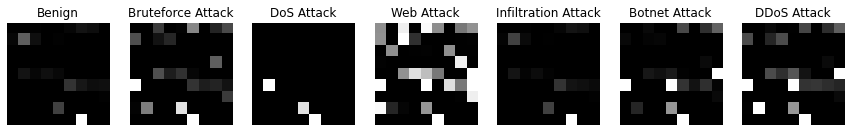

In [120]:
cnn = CNN(X, y, image_dim=9) # 81 Features = 9x9 Images
cnn.show_attack_matrix({0:'Benign', 1:'Bruteforce Attack', 2:'DoS Attack', 3:'Web Attack'
                             , 4:'Infiltration Attack', 5: 'Botnet Attack', 6:'DDoS Attack'})

In [13]:
cnn.run_model(5)

Iteration 0 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 2ms/step
 Model 0 accuracy: 0.8863512778684067 

Iteration 1 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 2ms/step
 Model 1 accuracy: 0.88689505165851 

Iteration 2 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 2ms/step
 Model 2 accuracy: 0.8771071234366503 

Iteration 3 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 2ms/step
 Model 3 accuracy: 0.8803697661772703 

Iteration 4 
 Model training in progress.
 Model testing in progress.
58/58 [==============================] - 0s 3ms/step
 Model 4 accuracy: 0.8814573137574769 



### LSTM

In this section, we will be training and testing a model built on the <b>Long-Short-Term Memory</b> neural network, a variety of Recurrent Neural Network that is typically used in situations where the data present classifies as sequential data.

In [26]:
lstm = self_LSTM(X, y)

In [27]:
lstm.run_model(5)

Iteration 0 
 Model training in progress.
Restoring model weights from the end of the best epoch: 58.
Epoch 63: early stopping
Restoring model weights from the end of the best epoch: 67.
Epoch 72: early stopping
 Model testing in progress.
58/58 [==============================] - 0s 1ms/step
 Model 0 accuracy: 0.8792822185970636 

Iteration 1 
 Model training in progress.
Restoring model weights from the end of the best epoch: 66.
Epoch 71: early stopping
Restoring model weights from the end of the best epoch: 66.
Epoch 71: early stopping
 Model testing in progress.
58/58 [==============================] - 0s 1ms/step
 Model 1 accuracy: 0.8955954323001631 

Iteration 2 
 Model training in progress.
Restoring model weights from the end of the best epoch: 75.
Epoch 80: early stopping
Restoring model weights from the end of the best epoch: 65.
Epoch 70: early stopping
 Model testing in progress.
58/58 [==============================] - 0s 2ms/step
 Model 2 accuracy: 0.8945078847199565 

I

# Model evaluation and comparison

## Plotting helper function

To streamline certain details for convenience when plotting several bar graphs into one function.

In [51]:
def plot_helper(rects, xpos='center', percentage=True):
    # dict to ensure correct horizontal alignment and offset for the plot
    ha = {'center': 'center', 'left': 'right', 'right': 'left'}
    offset = {'center': 0, 'left': -1, 'right': 1}

    # Aligning the value on every bar graph and statement to check if percentage is needed or not
    for rect in rects:
        height = rect.get_height()
        if percentage:
            ax.annotate('{}%'.format(height), ha=ha[xpos], va='bottom', xy=(rect.get_x() + rect.get_width() / 2, height), 
                        xytext=(offset[xpos]*3, 1), textcoords="offset points", fontsize = 11)
        else:
            ax.annotate('{}'.format(height), ha=ha[xpos], va='bottom', xy=(rect.get_x() + rect.get_width() / 2, height), 
                        xytext=(offset[xpos]*3, 1), textcoords="offset points", fontsize = 11)

## Accuracy and F1 Score

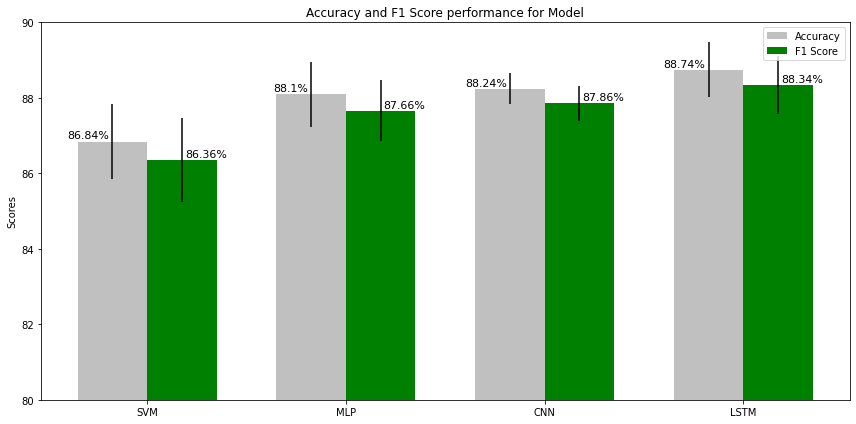

In [109]:
acc_means, acc_std = (round(svm.acc[0]*100,2), round(mlp.acc[0]*100,2), round(cnn.acc[0]*100,2), round(lstm.acc[0]*100,2)), \
                             (svm.acc[1]*100, mlp.acc[1]*100, cnn.acc[1]*100, lstm.acc[1]*100)
    
f1_means, f1_std = (round(svm.f1[0]*100,2), round(mlp.f1[0]*100,2), round(cnn.f1[0]*100,2), round(lstm.f1[0]*100,2)), \
                         (svm.f1[1]*100, mlp.f1[1]*100, cnn.f1[1]*100, lstm.f1[1]*100)

# To set the location of the labels for the model
index = np.arange(len(acc_means))
# Width of bar
width = 0.35

fig, ax = plt.subplots(figsize=(12,6))
accrect = ax.bar(index - width/2, acc_means, width, yerr=acc_std, label='Accuracy', color='silver')
f1rect = ax.bar(index + width/2, f1_means, width, yerr=f1_std, label='F1 Score', color='green')

# Adding text labels and tidy up the graph
ax.set_ylabel('Scores')
ax.set_title('Accuracy and F1 Score performance for Model')
ax.set_xticks(index)
ax.set_xticklabels(('SVM', 'MLP', 'CNN', 'LSTM'))
ax.legend()
plt.ylim(80,90)
plt.legend(bbox_to_anchor=(1,1))

plot_helper(accrect, "left")
plot_helper(f1rect, "right")
fig.tight_layout()

plt.savefig("acc_f1.pdf")
plt.savefig("acc_f1.png")
plt.show()

## False alarm rate

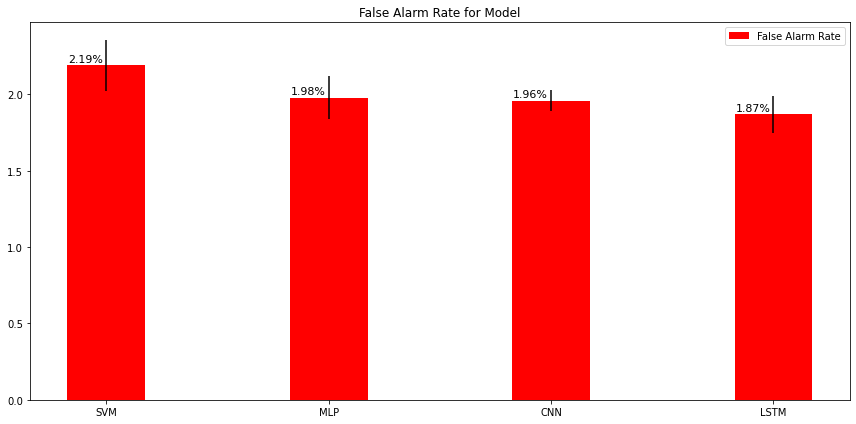

In [110]:
far_means, far_std = (round(svm.far[0]*100,2), round(mlp.far[0]*100,2), round(cnn.far[0]*100,2), round(lstm.far[0]*100,2)), \
(svm.far[1]*100, mlp.far[1]*100, cnn.far[1]*100, lstm.far[1]*100)

# To set the location of the labels for the model    
index = np.arange(len(far_means)) 
# Width of bar
width = 0.35 

fig, ax = plt.subplots(figsize=(12,6))
far_rect = ax.bar(index, far_means, width, yerr=far_std, label='False Alarm Rate', color='red')

# Adding text labels and tidy up the graph
ax.set_title('False Alarm Rate for Model')
ax.set_xticks(index)
ax.set_xticklabels(('SVM', 'MLP', 'CNN', 'LSTM'))
ax.legend()
plt.legend(bbox_to_anchor=(1,1))

plot_helper(far_rect, "left")
fig.tight_layout()

plt.savefig("far.png")
plt.savefig("far.pdf")
plt.show()

## Time taken to train each model

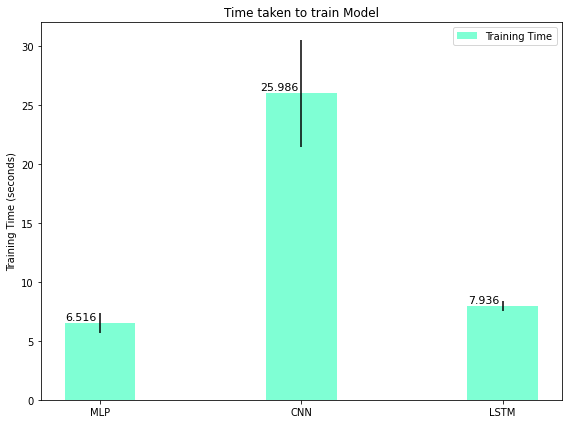

In [117]:
train_time_means, train_time_std = (round(mlp.train_time[0],3), round(cnn.train_time[0],3), round(lstm.train_time[0],3)), \
                     (mlp.train_time[1], cnn.train_time[1], lstm.train_time[1])

# To set the location of the labels for the model    
index = np.arange(len(train_time_means))
# Width of bar
width = 0.35  

fig, ax = plt.subplots(figsize=(8,6))
train_rect = ax.bar(index, train_time_means, width, yerr=train_time_std, label='Training Time', color='aquamarine')

# Adding text labels and tidy up the graph
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Time taken to train Model')
ax.set_xticks(index)
ax.set_xticklabels(('MLP', 'CNN', 'LSTM'))
ax.legend()
plt.legend(bbox_to_anchor=(1,1))

plot_helper(train_rect, "left", percentage=False)
fig.tight_layout()

plt.savefig("train_time.pdf")
plt.savefig("train_time.png")
plt.show()

## Time taken to test each model

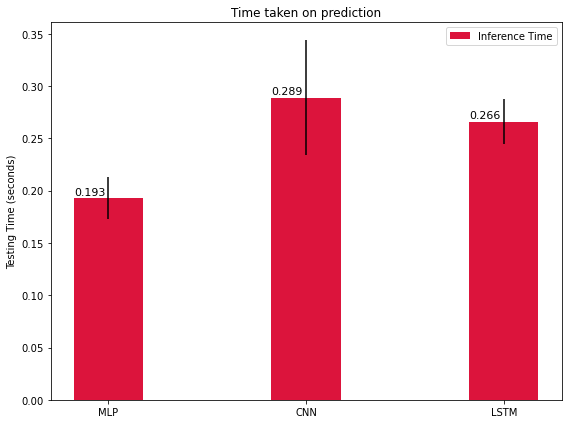

In [116]:
test_time_means, test_time_std = (round(mlp.test_time[0],3), round(cnn.test_time[0],3), round(lstm.test_time[0],3)), \
                     (mlp.test_time[1], cnn.test_time[1], lstm.test_time[1])

# To set the location of the labels for the model
index = np.arange(len(test_time_means)) 
# Width of bar
width = 0.35

fig, ax = plt.subplots(figsize=(8,6))
test_rect = ax.bar(index, test_time_means, width, yerr=test_time_std, label='Inference Time', color='crimson')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Testing Time (seconds)')
ax.set_title('Time taken on prediction')
ax.set_xticks(index)
ax.set_xticklabels(('MLP', 'CNN', 'LSTM'))
ax.legend()
plt.legend(bbox_to_anchor=(1,1))

plot_helper(test_rect, "left",percentage=False)
fig.tight_layout()

plt.savefig("test_time.pdf")
plt.savefig("test_time.png")
plt.show()